## Home price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
columns_to_drop = [
    'Order',         
    'PID',           # Parcel ID
    'Street',        # Mostly same
    'Alley',         # 90% missing
    'Utilities',     # Mostly same
    'Roof Matl',     # Very low variance
    'Pool QC',       # Almost all missing
    'Fence',         # Sparse
    'Misc Feature',  # Sparse
    'Fireplace Qu',  # You can drop or fill as needed
]

# Apply drop
df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [6]:
# Drop columns with more than 80% missing values
threshold = 0.8
df.dropna(thresh=len(df) * (1 - threshold), axis=1, inplace=True)


In [7]:
print(df.shape)

(2930, 72)


In [8]:
print(df.columns)

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
      

In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Lot Shape        2930 non-null   object 
 5   Land Contour     2930 non-null   object 
 6   Lot Config       2930 non-null   object 
 7   Land Slope       2930 non-null   object 
 8   Neighborhood     2930 non-null   object 
 9   Condition 1      2930 non-null   object 
 10  Condition 2      2930 non-null   object 
 11  Bldg Type        2930 non-null   object 
 12  House Style      2930 non-null   object 
 13  Overall Qual     2930 non-null   int64  
 14  Overall Cond     2930 non-null   int64  
 15  Year Built       2930 non-null   int64  
 16  Year Remod/Add   2930 non-null   int64  
 17  Roof Style    

In [11]:
print(df.describe())

       MS SubClass  Lot Frontage       Lot Area  Overall Qual  Overall Cond  \
count  2930.000000   2440.000000    2930.000000   2930.000000   2930.000000   
mean     57.387372     69.224590   10147.921843      6.094881      5.563140   
std      42.638025     23.365335    7880.017759      1.411026      1.111537   
min      20.000000     21.000000    1300.000000      1.000000      1.000000   
25%      20.000000     58.000000    7440.250000      5.000000      5.000000   
50%      50.000000     68.000000    9436.500000      6.000000      5.000000   
75%      70.000000     80.000000   11555.250000      7.000000      6.000000   
max     190.000000    313.000000  215245.000000     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count  2930.000000     2930.000000   2907.000000   2929.000000   2929.000000   
mean   1971.356314     1984.266553    101.896801    442.629566     49.722431   
std      30.245361       20.860286    179.112611

In [13]:
# Drop columns with >30% missing
missing = df.isnull().sum() / len(df)
drop_cols = missing[missing > 0.3].index
df.drop(drop_cols, axis=1, inplace=True)

# Fill numeric with median and categorical with mode
for col in df.select_dtypes(include='number'):
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\gadhv\AppData\Local\Temp\ipykernel_22380\1770718265.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\gadhv\AppData\Local\Temp\ipykernel_22380\1770718265.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [14]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
top_features = correlation[1:11].index.tolist()  # top 10 correlated features

print("Top Features:\n", top_features)


Top Features:
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'Year Remod/Add', 'Garage Yr Blt']


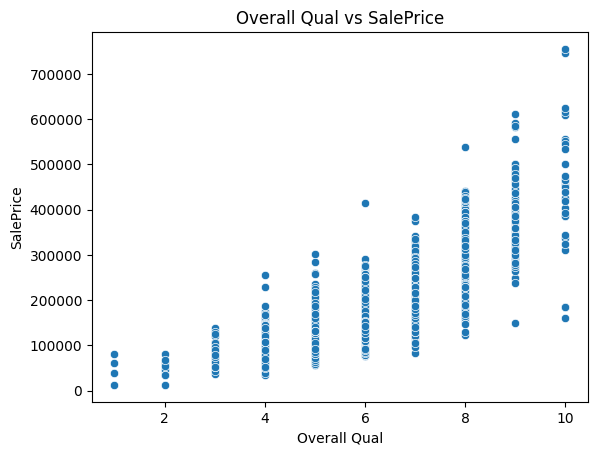

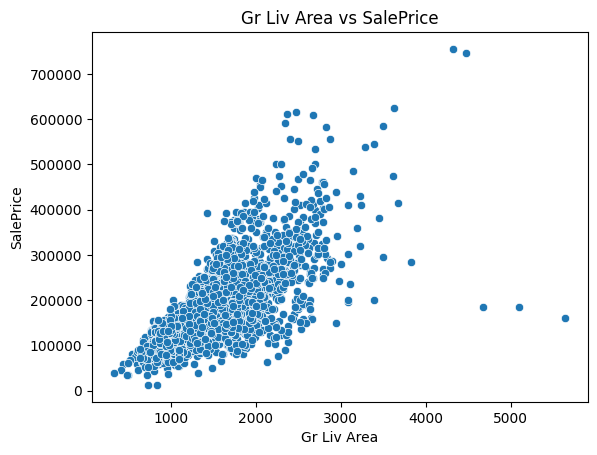

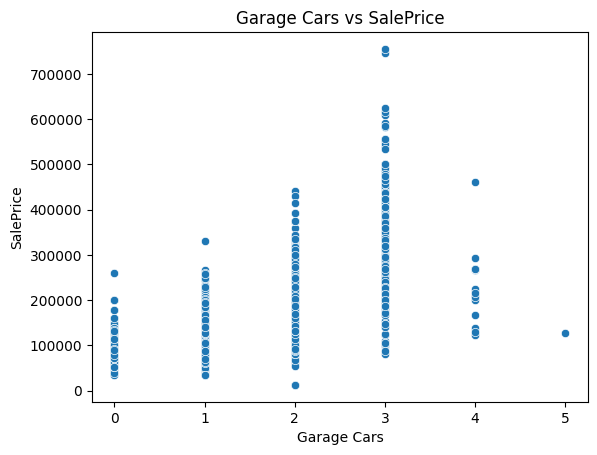

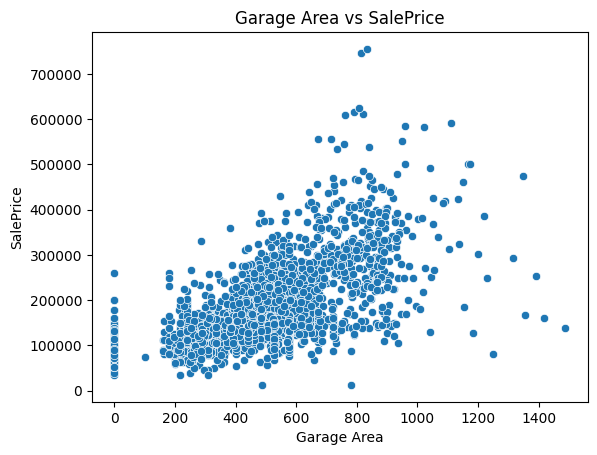

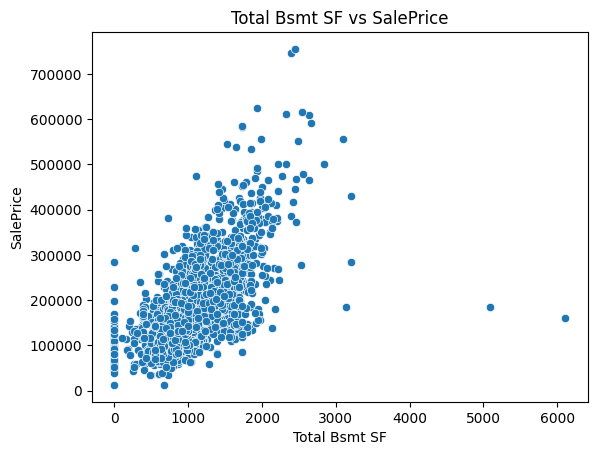

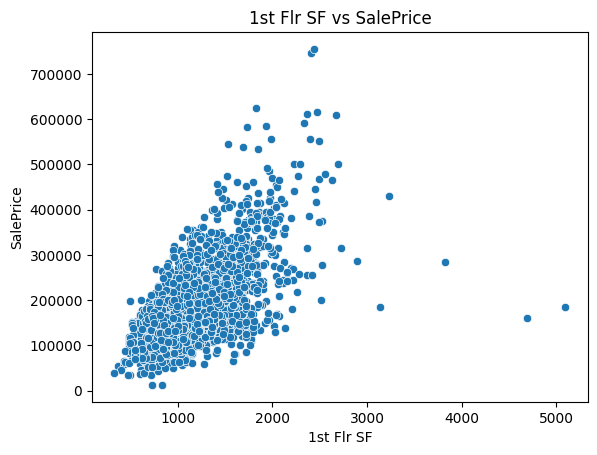

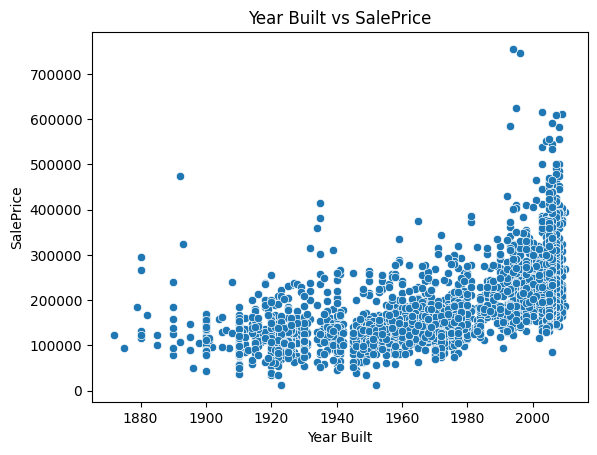

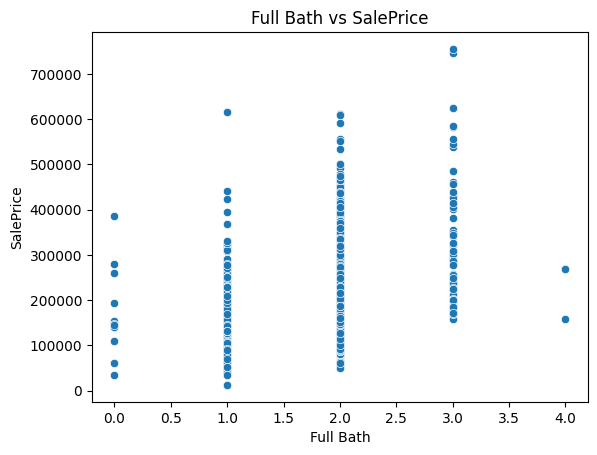

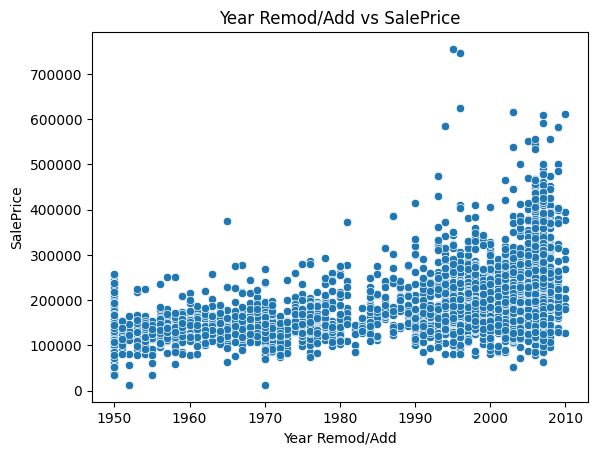

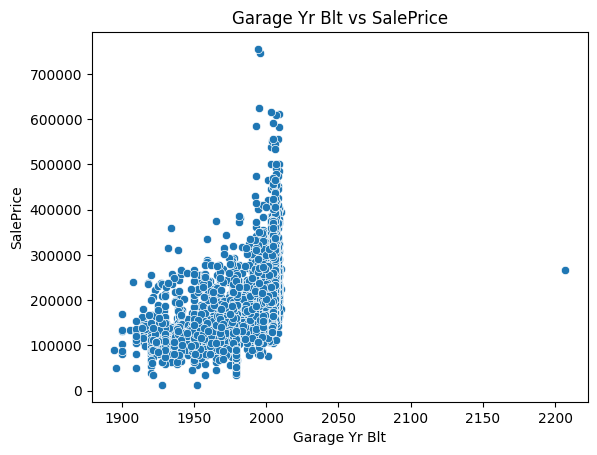

In [15]:
for col in top_features:
    sns.scatterplot(data=df, x=col, y='SalePrice')
    plt.title(f'{col} vs SalePrice')
    plt.show()


In [16]:
X = df[top_features]
y = df['SalePrice']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ RMSE:", rmse)
print("✅ R² Score:", r2)


✅ RMSE: 39298.57067150872
✅ R² Score: 0.8073753134833198


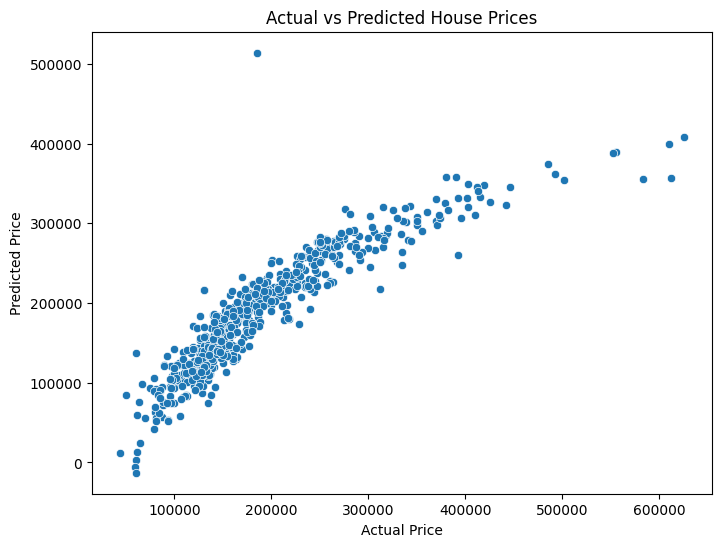

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [22]:
import joblib
joblib.dump(model, "house_price_model.txt")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']